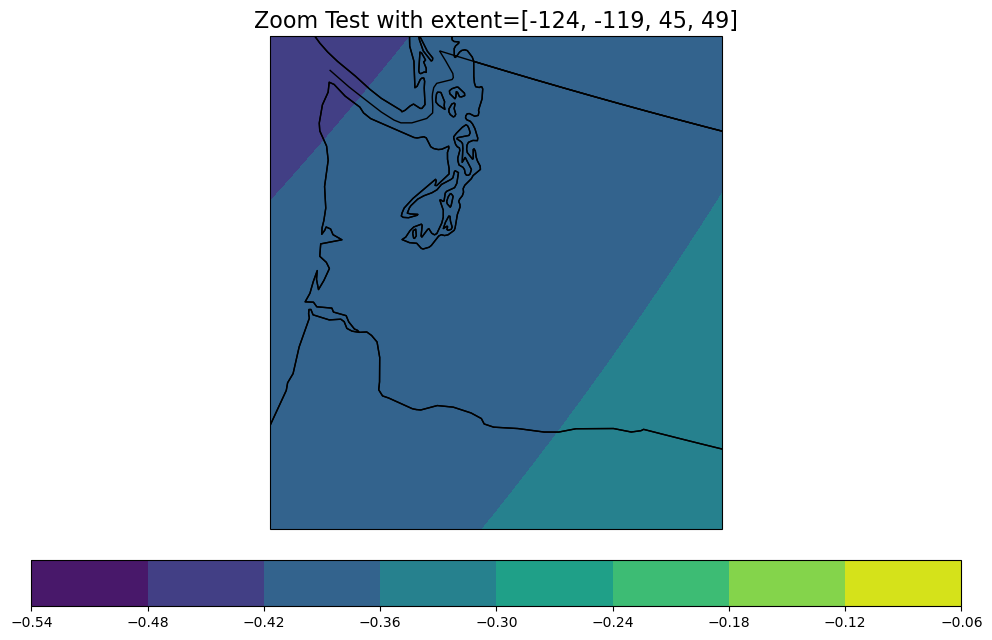

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Dummy lat/lon data
lons = np.linspace(-130, -100, 100)
lats = np.linspace(30, 55, 100)
lon2d, lat2d = np.meshgrid(lons, lats)

# Dummy data to plot
data = np.sin(np.deg2rad(lat2d)) * np.cos(np.deg2rad(lon2d))

# Try different extents here
# Format: [west_lon, east_lon, south_lat, north_lat]
extent = [-124, -119, 45, 49]  # <-- change this to test zoom

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Plot the dummy data
cs = ax.contourf(lon2d, lat2d, data, transform=ccrs.PlateCarree(), cmap='viridis')

# Add colorbar
plt.colorbar(cs, orientation='horizontal', pad=0.05)

# Title
ax.set_title(f"Zoom Test with extent={extent}", fontsize=16)

plt.show()
